In [237]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [255]:
spx = yf.Ticker("SP=F")
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")

period="5y"

spx_metals = pd.DataFrame({
    "SPX": spx.history(period=period)["Close"],
    "Gold": gold.history(period=period)["Close"],
    "Silver": silver.history(period=period)["Close"],
},
    columns=["SPX", "Gold", "Silver"]
)

# spx_metals = (spx_metals - spx_metals.mean()) / spx_metals.std()
# spx_metals.sort_values(by="Date", ascending=False, inplace=True)
spx_metals.head()

,SPX,Gold,Silver
Date,,,
2015-06-29,2050.5,1178.5,15.664
2015-06-30,2054.4,1171.5,15.551
2015-07-01,2070.9,1169.0,15.552
2015-07-02,2068.8,1163.0,15.537
2015-07-06,2064.6,1172.9,15.726


In [256]:
print(spx_metals.corr())

             SPX      Gold    Silver
SPX     1.000000  0.659168  0.075496
Gold    0.659168  1.000000  0.391674
Silver  0.075496  0.391674  1.000000


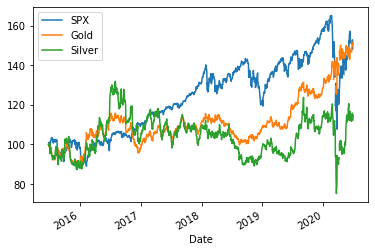

In [265]:
initial = (spx_metals.iloc[0] / 100).to_dict()

spx_metals_rebased = spx_metals / initial

spx_metals_rebased.plot()

In [274]:
spx_metals_rebased[["SPX_chg", "Gold_chg", "Silver_chg"]] = spx_metals_rebased[["SPX", "Gold", "Silver"]].pct_change()
spx_metals_rebased.head()

,SPX,Gold,Silver,SPX_chg,Gold_chg,Silver_chg
Date,,,,,,
2015-06-29,100.000000,100.000000,100.000000,NaN,NaN,NaN
2015-06-30,100.190198,99.406025,99.278601,0.001902,-0.005940,-0.007214
2015-07-01,100.994879,99.193891,99.284985,0.008032,-0.002134,0.000064
2015-07-02,100.892465,98.684769,99.189224,-0.001014,-0.005133,-0.000965
2015-07-06,100.687637,99.524820,100.395812,-0.002030,0.008512,0.012165
